# Módulo 1: Análisis de datos en el ecosistema Python

### Sesión (19)

# `ALEJANDRO SÁNCHEZ MONZÓN`

**226/012/2024**

# 1. Aprendizaje de máquina (automático):   **Machine Learning**

In [1]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
# importamos las librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
# Modificamos los parámetros de los gráficos en matplotlib
from matplotlib.pyplot import rcParams

rcParams['figure.figsize'] = 12, 6 # el primer dígito es el ancho y el segundo el alto
rcParams["font.weight"] = "bold"
rcParams["font.size"] = 10
rcParams["axes.labelweight"] = "bold"

---

### Customer clustering (**Segmentación de clientes**)

In [4]:
# Cargar los datos de clientes
df_cliente = pd.read_csv("WholesaleCustomersData.csv")

---

### **`Ejercicio 19.1`**

Vamos a realizar un problema de **clustring** dentro de las técnicas de **aprendizaje no supervisado** para agrupar los clientes de esta cadena de hipermercados.

**`19.1`** Genera una gráfica para visualizar la distribución de las variables del dataset en conjunto. Analiza dicha gráfica y explica si hay una necesidad de normalizar los datos.

**`19.2`** **Normaliza** todas las variables del dataset a una escala estándar. Puedes realizar las transformaciones necesarias con el objetivo de tener los **datos centralizados** (la media igual a _0_ con la desviación estándar igual a _1_) y vuelve a graficar la distribución de las variables con los datos normalizados.

**`19.3`** Utiliza la técnica de ___K-Means clustering___ para agrupar los clientes **en 2 grupos** y saca las métricas para evaluar el algoritmo de agrupación:
 - ***SSE***
 - ***Silhouette score*** 
 - `random_state=100`

**`19.4`** Grafica los resultados de este primer modelo, visualizando los clientes por sus gastos relacionados con las variables _`Fresh`-versus-`Milk`_, pintando cada punto por su `cluster` junto con los `centroides` de cada grupo.

**`19.5`** Grafica los resultados de este primer modelo, visualizando los clientes por sus gastos, ésta vez relacionados con las variables _`Grocery`-versus-`Detergents_Paper`_, pintando cada punto por su `cluster` junto con los `centroides` de cada grupo. Después explica cual de estas dos gráficas te parecen más intuitivas e intenta analizar el perfil de los compradores según cada gráfica.

**`19.6`** Calcula el rendimiento de los `cluster` para diferentes números de grupos (hasta **30 no inclusive**). Analiza esta evolución usando la técnica de `Elbow method` y explica cómo podrían ser los valores óptimos para la cantidad de clusters (__K__).

**`19.7`** Calcula el rendimiento de los `cluster` para diferentes números de grupos. Analiza esta vez la evolución usando el valor de `silhouette_score` y explica cómo podrían ser los valores óptimos para la cantidad de clusters.  
Finalmente elige **1 o 2 valores como máximo** que serían una buena opción para el parámetro (__K__), detallando tus criterios al respecto.

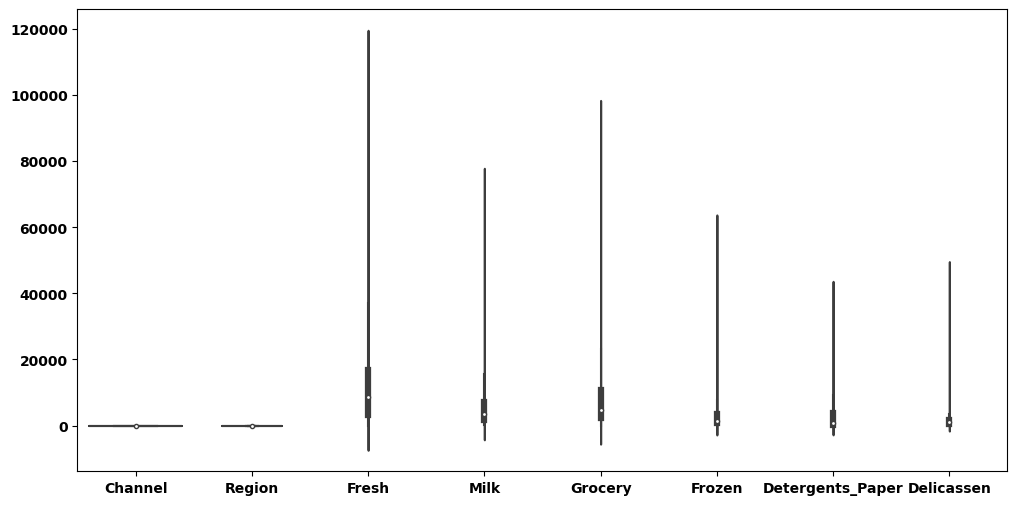

In [5]:
## Solución 19.1
sns.violinplot(data=df_cliente,  orient='v')
plt.show()

> #### Explicación 19.1
> Existe una diferenciacón bastante notoria entre los valores de cada variable, por lo que considero que **SI** es necesario **normalizar**. 

In [7]:
## Solución 19.2
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_cliente_scaled = pd.DataFrame(scaler.fit_transform(df_cliente), columns=df_cliente.columns)

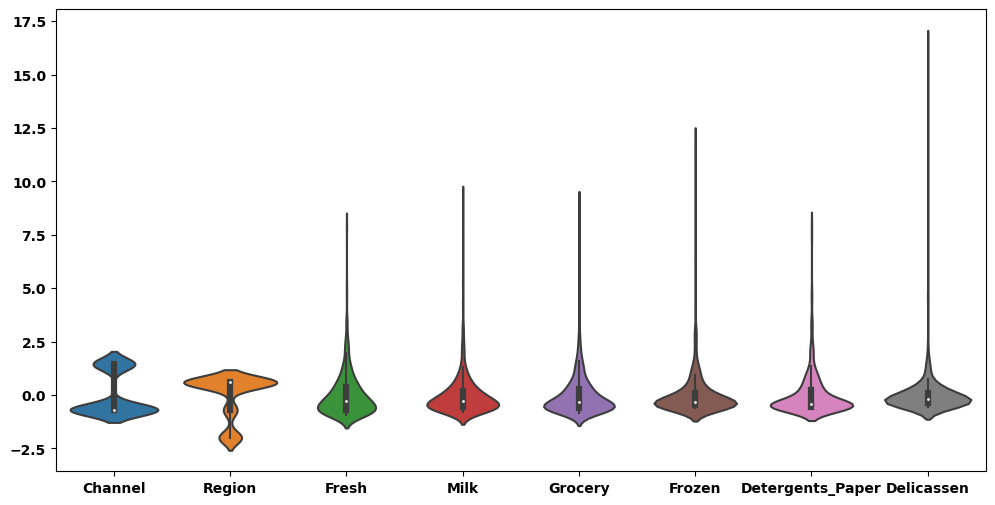

In [8]:
sns.violinplot(data=df_cliente_scaled,  orient='v')
plt.show()

> #### Explicación 19.2
> Se puede observar como ahora la distribución ha **cambiado** y los datos no son tan dispersos.

In [10]:
## Solución 19.3
from sklearn.cluster import KMeans

kmeans_19 = KMeans(n_clusters=2, random_state=100)
clusters_19 = kmeans_19.fit_predict(df_cliente_scaled)

c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [12]:
from sklearn.metrics import silhouette_score

sse_19_3 = kmeans_19.inertia_
silhouette_19_3 = silhouette_score(df_cliente_scaled, clusters_19)

In [13]:
print("SSE =", sse_19_3)
print("Silhouette score =", silhouette_19_3)

SSE = 2599.64045525879
Silhouette score = 0.37289399049875543


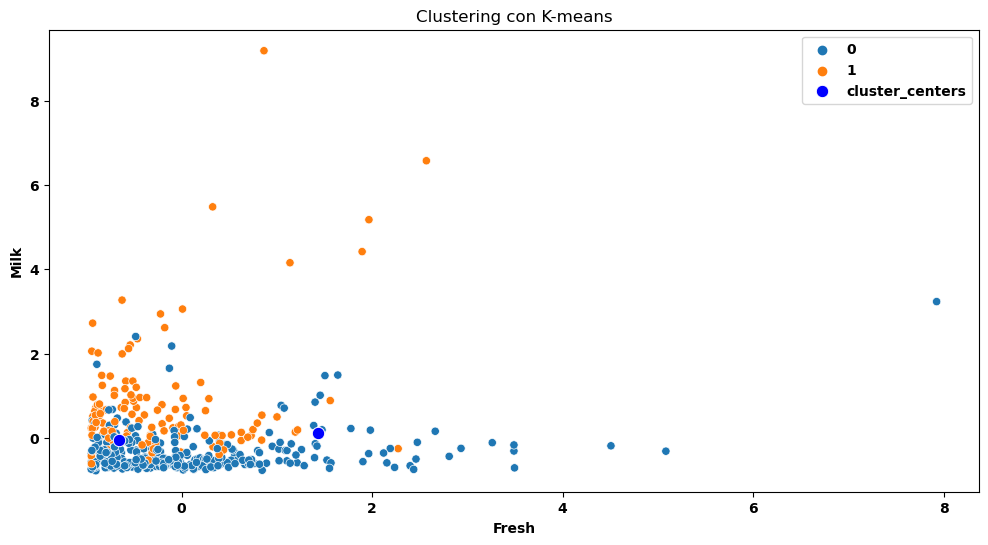

In [14]:
## Solución 19.4
sns.scatterplot(x=df_cliente_scaled['Fresh'], y=df_cliente_scaled['Milk'], hue=kmeans_19.labels_)
sns.scatterplot(x=kmeans_19.cluster_centers_[:,0], y=kmeans_19.cluster_centers_[:,1], color='blue', s=80, label='cluster_centers')
plt.title("Clustering con K-means")
plt.show()

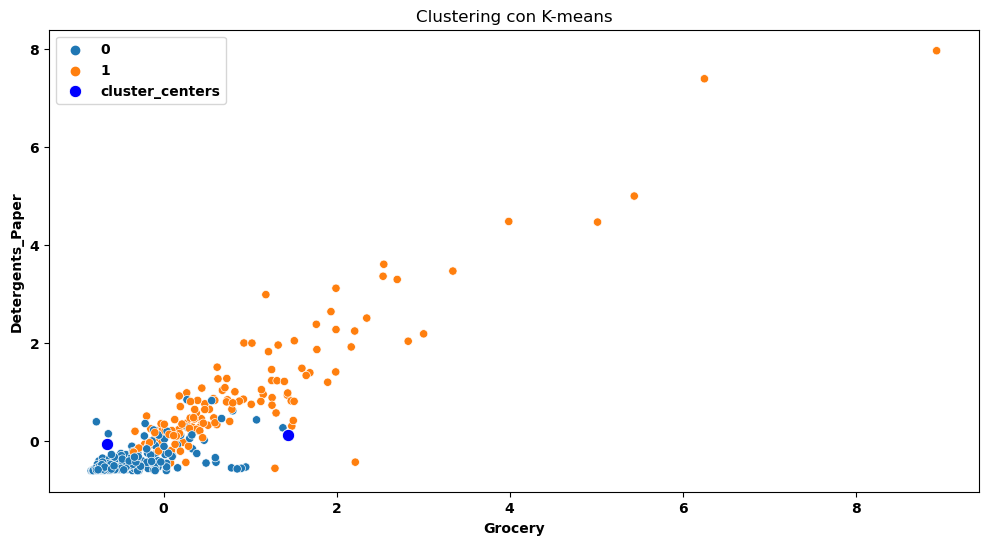

In [15]:
## Solución 19.5
sns.scatterplot(x=df_cliente_scaled['Grocery'], y=df_cliente_scaled['Detergents_Paper'], hue=kmeans_19.labels_)
sns.scatterplot(x=kmeans_19.cluster_centers_[:,0], y=kmeans_19.cluster_centers_[:,1], color='blue', s=80, label='cluster_centers')
plt.title("Clustering con K-means")
plt.show()

> #### Explicación 19.5
> Bajo mi punto de vista, considero que la **segunda gráfica** (ejercicio 19.5) es algo más **intuitiva** que la primera, ya que podemos ver de una forma algo más clara esa agrupación entre ambos centros y sus respectivos valores. La primera gráfica, tenía los valores algo más compactos y solapados, lo que complica más su interpretación.
>
> Según la gráfica de del ejercicio 19.4, los clientes parecen tener un perfil muy equilibrado, donde por lo general la compra de Milk y Fresh es relativamente parecida.
> Por otro lado, el perfil de los clientes para la gráfica del ejercicio 19.5 está algo más diversificada. Los clientes compran muchos menos productos 'Grocery' en comparación a 'Detergents Paper', donde si son más propensos. 

c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

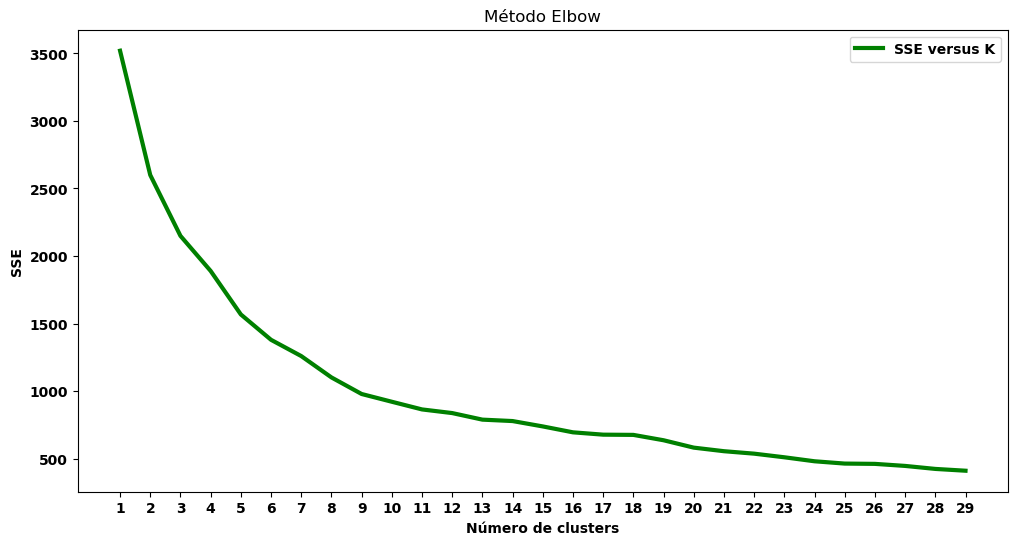

In [16]:
## Solución 19.6
sse_19_6 = []
for k in range(1, 30):
    kmeans_19_6 = KMeans(n_clusters=k, random_state=100)
    kmeans_19_6.fit(df_cliente_scaled)
    sse_19_6.append(kmeans_19_6.inertia_)

sns.lineplot(x=range(1,30), y=sse_19_6, color='green', label='SSE versus K', linewidth=3)
plt.xticks(range(1,30))
plt.title('Método Elbow')
plt.xlabel('Número de clusters')
plt.ylabel('SSE')
plt.show()

> #### Explicación 19.6
> Considero que, siguiendo el Método Elbow, el valor óptimo para el número de clusters ronda entre el **9, 10 y 11**, donde se puede observar una caida por debajo de un valor de SSE de 1000.

c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

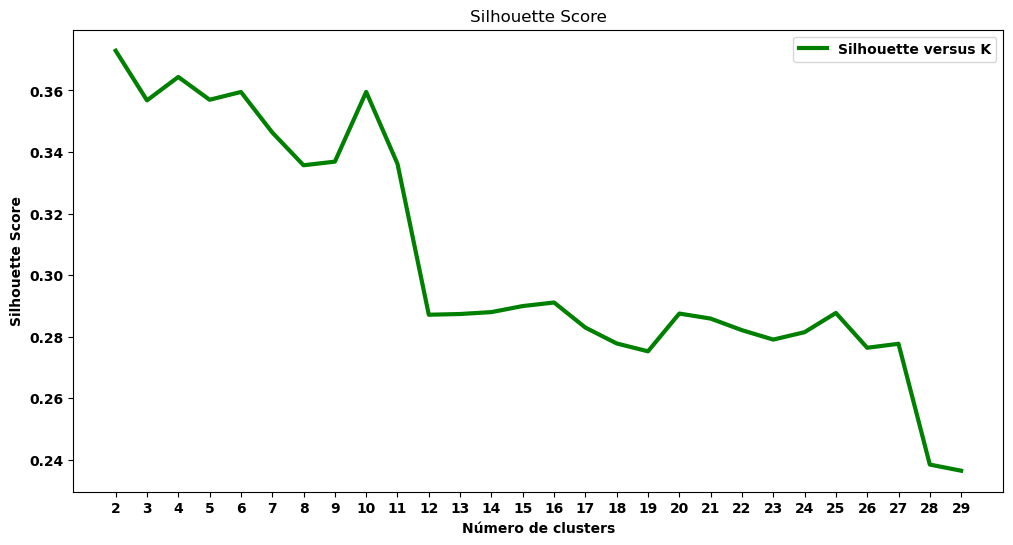

In [17]:
## Solución 19.7
silhouette_19_7 = []
for k in range(2, 30):
    kmeans_19_7 = KMeans(n_clusters=k, random_state=100)
    clusters_19_7 = kmeans_19_7.fit_predict(df_cliente_scaled)
    silhouette_19_7.append(silhouette_score(df_cliente_scaled, clusters_19_7))

sns.lineplot(x=range(2,30), y=silhouette_19_7, color='green', label='Silhouette versus K', linewidth=3)
plt.xticks(range(2, 30))
plt.title('Silhouette Score')
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette Score')
plt.show()

> #### Explicación 19.7
> En esta gráfica podemos ver una caida de score en torno al número de clusters **9, 10 y 11**, esta caída es bastante notoria.
>
> Conociendo que en la anterior gráfica, siguiendo el método Elbow, el rango de clusters que intuiamos que podía ser óptimo parece ser parecido al que nos da a entender esta gráfica.
>
> Para finalizar, eligiría los valores **10 y 11** para el **número de clusters**. Alguno de estos valores podría ser, siguiendo el método Elbow, y analizando esta gráfica, el **valor óptimo** para poder desarrollar nuestro modelo con la mayor eficiencia y rendiiento posible.

---